<a href="https://colab.research.google.com/github/GJ-007-sage/Astronomy/blob/main/3_body_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

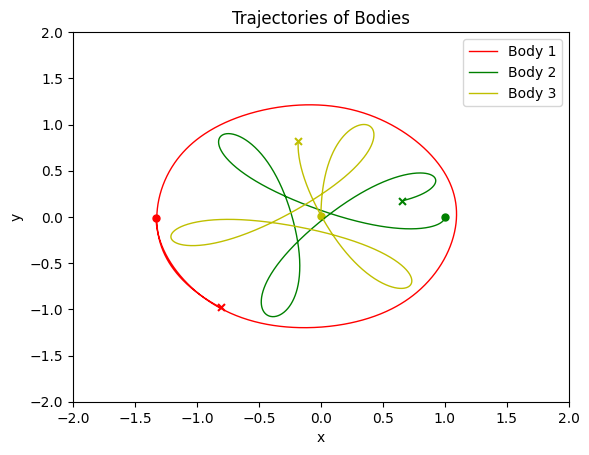

In [14]:
from os import MFD_HUGE_16GB
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define the gravitational constant
G = 1

class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.force = np.zeros(2, dtype=float)

    def update_position(self, dt):
        self.position += self.velocity * dt

    def update_velocity(self, dt):
        self.velocity += self.force / self.mass * dt

class ThreeBodySystem:
    def __init__(self, bodies):
        self.bodies = bodies

    def compute_forces(self):
        for body in self.bodies:
            body.force = np.zeros(2, dtype=float)
        for i, body1 in enumerate(self.bodies):
            for j, body2 in enumerate(self.bodies):
                if i != j:
                    r = body2.position - body1.position
                    distance = np.linalg.norm(r)
                    if distance != 0:
                        force_magnitude = G * body1.mass * body2.mass / distance**2
                        body1.force += force_magnitude * r / distance

    def update(self, dt):
        self.compute_forces()
        for body in self.bodies:
            body.update_velocity(dt)
            body.update_position(dt)

# Initializing bodies
m1 = 1.0124
m2 = 0.9968


x1 = -1.32962



v1 = -0.88963
v2 = -0.28501
v3 = -(m1*v1 + m2*v2)

body1 = Body(m1, [x1, 0], [0.0, v1])
body2 = Body(m2, [1.0, 0.0], [0.0, v2])
body3 = Body(1.0, [0.0, 0.0], [0.0, v3])

system = ThreeBodySystem([body1, body2, body3])

def simulate(system, steps, dt):
    positions = []
    for _ in range(steps):
        system.update(dt)
        positions.append([body.position.copy() for body in system.bodies])
    return np.array(positions)

# Simulation parameters
steps = 1000
dt = 0.01
positions = simulate(system, steps, dt)

# Plotting trajectories
fig, ax = plt.subplots()
colors = ['r', 'g', 'y']
for i in range(3):
    ax.plot(positions[:, i, 0], positions[:, i, 1], color=colors[i], label=f'Body {i+1}', linewidth=1)
# Mark initial positions with 'o' and final positions with 'x'
for i in range(3):
    ax.scatter(positions[0, i, 0], positions[0, i, 1], color=colors[i], marker='o', s=25)  # Initial positions
    ax.scatter(positions[-1, i, 0], positions[-1, i, 1], color=colors[i], marker='x', s=25)  # Final positions

ax.set_title('Trajectories of Bodies')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-2.0, 2.0)
ax.set_ylim(-2.0, 2.0)

ax.legend()
plt.savefig("three_body_trajectories.png")
plt.show()



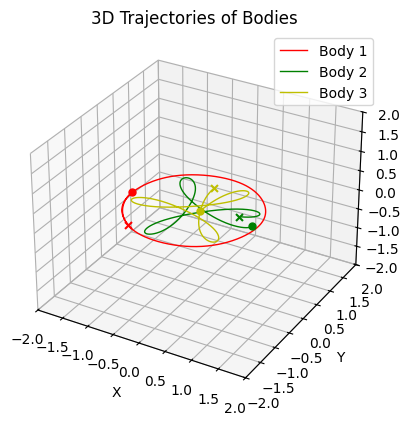

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from IPython.display import HTML

# Define the gravitational constant
G = 1

class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.force = np.zeros(3, dtype=float)  # Now handling 3D forces

    def update_position(self, dt):
        self.position += self.velocity * dt

    def update_velocity(self, dt):
        self.velocity += self.force / self.mass * dt

class ThreeBodySystem:
    def __init__(self, bodies):
        self.bodies = bodies

    def compute_forces(self):
        for body in self.bodies:
            body.force = np.zeros(3, dtype=float)  # Now handling 3D forces
        for i, body1 in enumerate(self.bodies):
            for j, body2 in enumerate(self.bodies):
                if i != j:
                    r = body2.position - body1.position
                    distance = np.linalg.norm(r)
                    if distance != 0:
                        force_magnitude = G * body1.mass * body2.mass / distance**2
                        body1.force += force_magnitude * r / distance

    def update(self, dt):
        self.compute_forces()
        for body in self.bodies:
            body.update_velocity(dt)
            body.update_position(dt)

# Initializing bodies
m1 = 1.0124
m2 = 0.9968
m3 =1


x1 = -1.32962
x2 = 1
x3= 0

v1 = -0.88963
v2 = -0.28501
v3 = -(m1*v1 + m2*v2)

body1 = Body(m1, [x1, 0, 0], [0.0, v1, 0])  # 3D position and velocity
body2 = Body(m2, [1.0, 0.0, 0.0], [0.0, v2, 0])  # 3D position and velocity
body3 = Body(1.0, [0.0, 0.0, 0.0], [0.0, v3, 0])  # 3D position and velocity

system = ThreeBodySystem([body1, body2, body3])

def simulate(system, steps, dt):
    positions = []
    for _ in range(steps):
        system.update(dt)
        positions.append([body.position.copy() for body in system.bodies])
    return np.array(positions)

# Simulation parameters
steps = 1000
dt = 0.01
positions = simulate(system, steps, dt)

# Plotting trajectories in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'y']
for i in range(3):
    ax.plot(positions[:, i, 0], positions[:, i, 1], positions[:, i, 2], color=colors[i], label=f'Body {i+1}', linewidth=1)

# Mark initial positions with 'o' and final positions with 'x'
for i in range(3):
    ax.scatter(positions[0, i, 0], positions[0, i, 1], positions[0, i, 2], color=colors[i], marker='o', s=25)  # Initial positions
    ax.scatter(positions[-1, i, 0], positions[-1, i, 1], positions[-1, i, 2], color=colors[i], marker='x', s=25)  # Final positions

ax.set_title('3D Trajectories of Bodies')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-2.0, 2.0)
ax.set_ylim(-2.0, 2.0)
ax.set_zlim(-2.0, 2.0)

ax.legend()
plt.savefig("three_body_trajectories_3d.png")
plt.show()


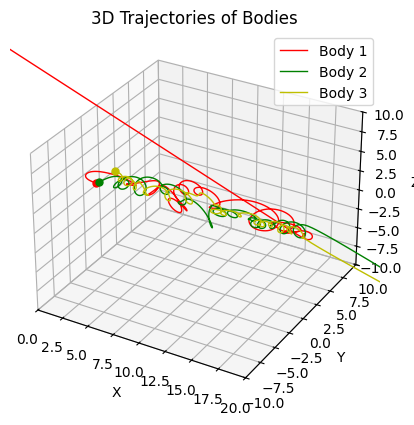

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from IPython.display import HTML

# Define the gravitational constant
G = 1

class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.force = np.zeros(3, dtype=float)  # Now handling 3D forces

    def update_position(self, dt):
        self.position += self.velocity * dt

    def update_velocity(self, dt):
        self.velocity += self.force / self.mass * dt

class ThreeBodySystem:
    def __init__(self, bodies):
        self.bodies = bodies

    def compute_forces(self):
        for body in self.bodies:
            body.force = np.zeros(3, dtype=float)  # Now handling 3D forces
        for i, body1 in enumerate(self.bodies):
            for j, body2 in enumerate(self.bodies):
                if i != j:
                    r = body2.position - body1.position
                    distance = np.linalg.norm(r)
                    if distance != 0:
                        force_magnitude = G * body1.mass * body2.mass / distance**2
                        body1.force += force_magnitude * r / distance

    def update(self, dt):
        self.compute_forces()
        for body in self.bodies:
            body.update_velocity(dt)
            body.update_position(dt)

# Initializing bodies

body1 = Body(10, [-1, 1, -1.1], [-3, 0, 0])
body2 = Body(20, [0, 0, 0], [0, 0, 0])
body3 = Body(30, [1, 1, 1.2], [3, 0, 0])

system = ThreeBodySystem([body1, body2, body3])

def simulate(system, steps, dt):
    positions = []
    for _ in range(steps):
        system.update(dt)
        positions.append([body.position.copy() for body in system.bodies])
    return np.array(positions)

# Simulation parameters
steps = 20000
dt = 0.01
positions = simulate(system, steps, dt)

# Plotting trajectories in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'y']
for i in range(3):
    ax.plot(positions[:, i, 0], positions[:, i, 1], positions[:, i, 2], color=colors[i], label=f'Body {i+1}', linewidth=1)

# Mark initial positions with 'o' and final positions with 'x'
for i in range(3):
    ax.scatter(positions[0, i, 0], positions[0, i, 1], positions[0, i, 2], color=colors[i], marker='o', s=25)  # Initial positions
    ax.scatter(positions[-1, i, 0], positions[-1, i, 1], positions[-1, i, 2], color=colors[i], marker='x', s=25)  # Final positions

ax.set_title('3D Trajectories of Bodies')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0, 20)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

ax.legend()
plt.savefig("three_body_trajectories_3d.png")
plt.show()
